## load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Y and X
X: all except returned
Y: returned

In [13]:
df_model_auctions = pd.read_csv('used_car_extend_model_clean.csv')

In [14]:
# y will be auction_start_price
df_model_auctions['auction_start_price'].isnull().sum()

0

In [15]:
df_model_auctions = df_model_auctions.reset_index()

In [67]:
y_vecs_return = df_model_auctions[['returned']]
x_vecs_return = df_model_auctions.drop(['returned'], axis=1)

y_vecs_price = df_model_auctions[['auction_start_price']]
x_vecs_price = df_model_auctions.drop(['auction_start_price'], axis=1)#,'insp_rep_priceSellerExpectation'
#'insp_rep_priceInspectorExpectation''auction_start_price'

In [18]:
print (y_vecs_price.shape, y_vecs_return.shape, x_vecs_return.shape)

(23835, 1) (23835, 1) (23835, 760)


In [16]:
returned_rate = y_vecs_return[y_vecs_return['returned'] == 1].shape[0]/y_vecs_return[y_vecs_return['returned'] == 0].shape[0]
print('returned rate',returned_rate)


returned rate 0.04192166462668299


## Predict returned (machine learning)

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_vecs_return,y_vecs_return,test_size=0.2)

In [21]:
x_train.isnull().sum().sum()

0

In [49]:
from sklearn import ensemble

params = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.01,
    'criterion': 'mse'
}

In [53]:
gradient_boosting_classi = ensemble.GradientBoostingClassifier(**params)

In [54]:
gradient_boosting_classi.fit(x_train, y_train)

/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.01,
              loss='deviance', max_depth=6, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

RangeIndex(start=0, stop=1, step=1)


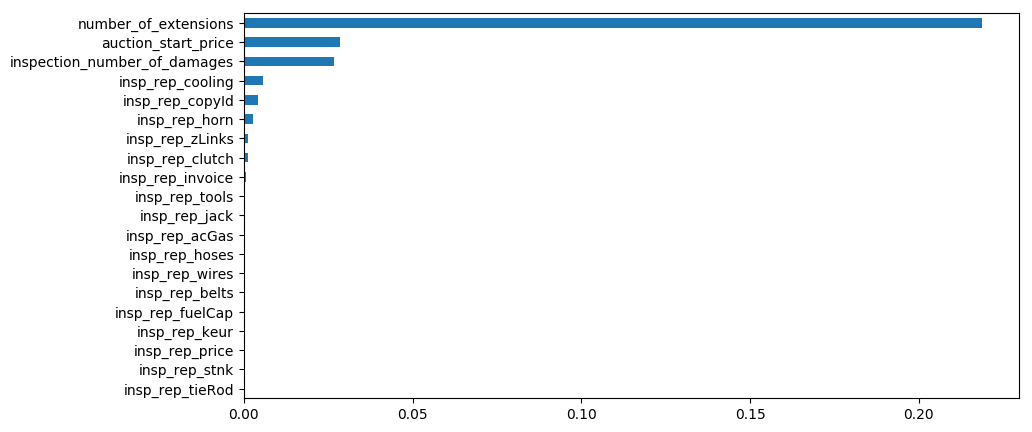

In [56]:
## create df of feature important to make plotting easy
data= []
dat ={}
objects = list(x_train.columns)[1:21] # exclude index
f_important = gradient_boosting_classi.feature_importances_[1:21]
for i in range(len(objects)):
    dat[objects[i]] =  f_important[i]
data +=[dat]

df_imp = pd.DataFrame(data)
df_imp = df_imp.transpose()
print (df_imp.columns)
df_imp = df_imp.sort_values(by=0, axis=0, ascending=True)
df_imp

# make plot
df_imp.plot(kind='barh',legend=False, figsize=(10,5))

In [57]:
print("Accuracy score (training): {0:.3f}".format(gradient_boosting_classi.score(x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gradient_boosting_classi.score(x_test, y_test)))

Accuracy score (training): 0.969
Accuracy score (validation): 0.966


## Price Prediction

In [30]:
# Must remove X that contains price variable

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_vecs_price,y_vecs_price,test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso#, ElasticNetCV, 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



In [9]:
from sklearn.model_selection import cross_val_score


In [42]:
lin_reg = LinearRegression()
deci_tree = DecisionTreeRegressor()
lasso_reg = Lasso(alpha=0.05)


In [69]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
deci_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [71]:
lasso_reg.fit(x_train, y_train)

/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
lin_reg_accuracy_scores = cross_val_score(lin_reg,x_vecs_price,y_vecs_price, cv = 5)

In [74]:
deci_tree_accuracy_scores = cross_val_score(deci_tree,x_vecs_price,y_vecs_price, cv = 5)
# deci_tree_mae_accuracy_scores = cross_val_score(deci_tree_mae,x_vecs,y_vecs_price, cv = 5)

In [75]:
lasso_reg_accuracy_scores = cross_val_score(lasso_reg,x_vecs_price,y_vecs_price, cv = 5)


/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/skle

## Compare different ML methods

In [76]:
import seaborn as sns

[Text(0, 0, 'Linear'), Text(0, 0, 'Decision'), Text(0, 0, 'Lasso')]

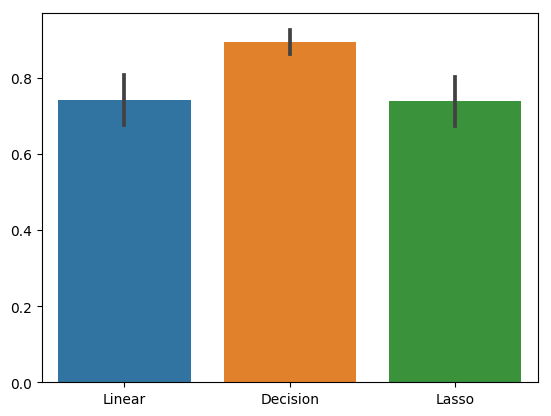

In [112]:
 
data=[lin_reg_accuracy_scores,deci_tree_accuracy_scores,lasso_reg_accuracy_scores]
ax = sns.barplot(data = data)
ax.set_xticklabels(['Linear','Decision', 'Lasso'])


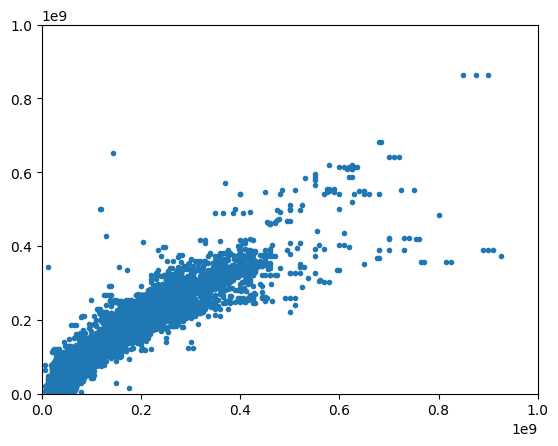

In [118]:
plt.plot(y_vecs_price, y_pred, '.')
plt.xlim([0,1e9])
plt.ylim([0,1e9])
plt.show()

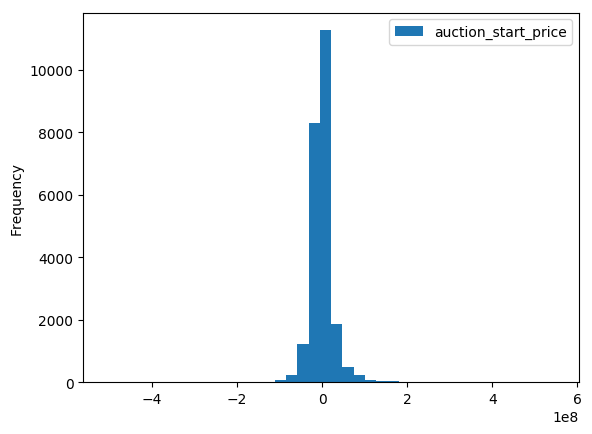

In [135]:
y_error_lin = y_vecs_price - y_pred
y_error_lin.plot(kind='hist', bins=40)

In [113]:
y_pred = lin_reg.predict(x_vecs_price)

In [80]:
indx_sort = lin_reg.coef_[0].argsort()[:].flatten()
name_sort = list(x_vecs_price.iloc[:,indx_sort])
indx_most = indx_sort[-20:].flatten()
name_most = list(x_vecs_price.iloc[:,indx_most])

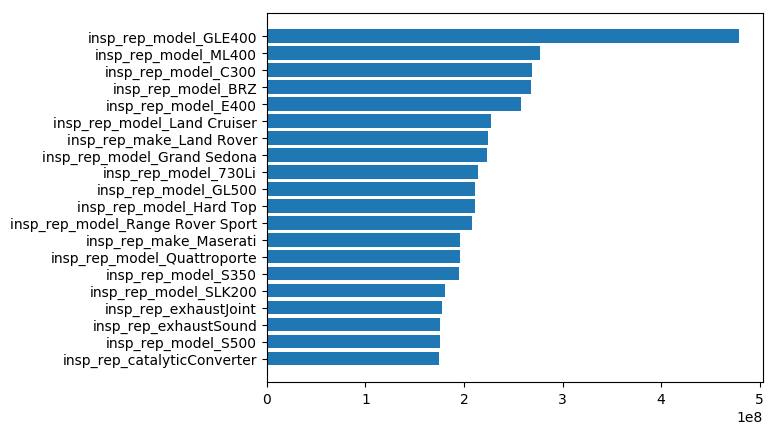

In [81]:
plt.barh(np.arange(20),lin_reg.coef_[0][indx_most].squeeze())
plt.yticks(np.arange(20),name_most)#, rotation='vertical')
plt.show()